In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Exercise 1 - Calculate $\pi$

Using the **DSMC method**, calculate the value of **$\pi$**.


**Approach:**
In order to do this, create a 2-dimensional domain (defined by the coordinates $x_{min}, x_{max}, y_{min}, y_{max}$) and launch a number P of particles at random locations within. Check which particles lie inside a circle with radius $$ \frac{x_{max}-x_{min}}{2}, $$ where $x_{min}, x_{max}$ are the x-limits of your 2D domain. 

Get your value for $\pi$ by using the following formula:
$\pi = \frac{4 \cdot n_{inside}}{P},$ where $n_{inside}$ is the number of particles inside the circle and $P$ is the total number of particles.

**a)** Play around with the number of particles and plot your calculated value as a function of this number. 

**b)** Also plot the difference between the value you obtained for $\pi$ and the real one (as a function of P). 

**c)** Make a plot for your domain, highlighting the particles that are inside the circle.

In [11]:
#use the DSMC method to calcualte the value of pi
#the approach here is to create a 2-dimensional domain (x_min, x_max, y_mmin, y_max) and launch a number p pf particles at random locations within 
#next wanna check if the particles lie inside a circle with radius (x_max - x_min)/2 where x_min and x_max are the x-limits of the 2-dimensional domain
#by using this formula, i get the amount of particles which lay within the circle, n_inside
#thevalue for pi i then get by the formula pi = 4*n_inside/p

#define the domain
#square with the limits x_min = -1, x_max = 1, y_min = -1, y_max = 1
x_min = -1
x_max = 1
y_min = -1
y_max = 1

#define the radius of the circle
radius = (x_max - x_min)/2

#define the number of particles
#number of particles = 1000
p_initial = 1000000

#generate random x and y coordinates for the particles
x_initial = np.random.uniform(x_min, x_max, p_initial) #uniform distribution of random x-coordinates
y_initial = np.random.uniform(y_min, y_max, p_initial) #uniform distribution of random y-coordinates

#check if the particles lie within the circle
inside_circle_initial = (x_initial**2 + y_initial**2) < radius**2
n_inside_initial = np.sum(inside_circle_initial) 

#calculate the value of pi
pi = (4*n_inside_initial)/p_initial

print("value of pi: ", pi)


value of pi:  3.140136


the higher the amount of p particles, the higher the accuracy of the value for pi is !!!

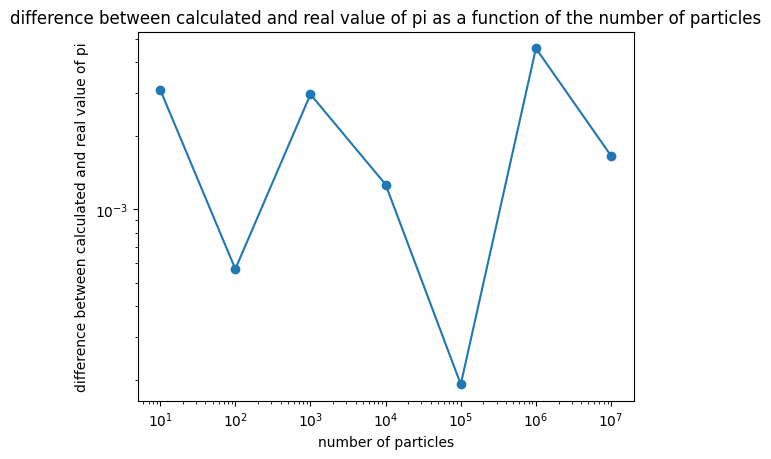

In [12]:
#plot the difference between the value of pi i calculated and the real value of pi 
#function of the number of particles p

#define the real value of pi
pi_real = np.pi

#calculating the difference as a function of the number of particles p
p_values = np.logspace(1, 7, 7) # values for the number of particles p (from 10 to 10^7) with the number of values to generate being 7
difference = np.zeros(7) # array to store the difference values 

for i in range(7):
    p = int(p_values[i])
    x = np.random.uniform(x_min, x_max, p_initial) #uniform distribution of random x-coordinates
    y = np.random.uniform(y_min, y_max, p_initial) #uniform distribution of random y-coordinates
    inside_circle = (x**2 + y**2) < radius**2
    n_inside = np.sum(inside_circle) #sum up the particles which lie within the circle
    pi = (4*n_inside)/p_initial #calculate the value of pi
    difference[i] = np.abs(pi - pi_real) #store the difference 

plt.plot(p_values, difference, 'o-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of particles')
plt.ylabel('difference between calculated and real value of pi')
plt.title('difference between calculated and real value of pi as a function of the number of particles')
plt.show()


Number of points inside the circle:  787
Number of points outside the circle:  213


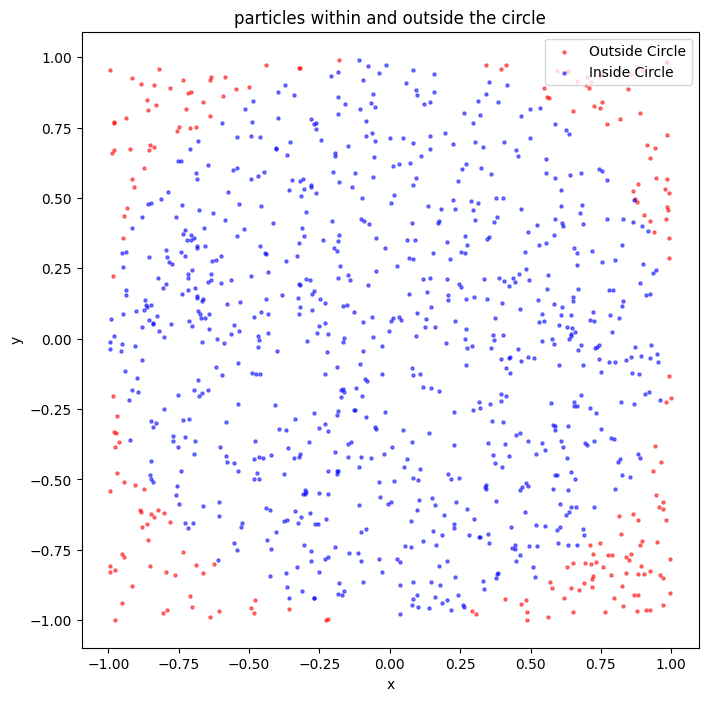

In [13]:
#plot the 2-dimensional domain in order to highlight the particles which lie within the circle
#this i wanna do for the case where p = 1000000

p_final = 1000

#generate random x and y coordinates for the particles
x_final = np.random.uniform(x_min, x_max, p_final) #uniform distribution of random x-coordinates
y_final = np.random.uniform(y_min, y_max, p_final) #uniform distribution of random y-coordinates

inside_circle_final = (x_final**2 + y_final**2) < radius**2
outside_circle_final = ~inside_circle_final

print("Number of points inside the circle: ", np.sum(inside_circle_final))
print("Number of points outside the circle: ", np.sum(outside_circle_final))

#plot the 2-dimensional domain
plt.figure(figsize=(8, 8))
plt.scatter(x_final[outside_circle_final], y_final[outside_circle_final], s=5, color='red', alpha=0.5, label='Outside Circle')
plt.scatter(x_final[inside_circle_final], y_final[inside_circle_final], s=5, color='blue', alpha=0.5, label='Inside Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('particles within and outside the circle')
plt.legend(loc='upper right')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 2 - Metropolis-Hastings

Using the Metropolis-Hastings algorithm, find the standard deviation $\sigma$ and mean value $\mu$ of a random Gaussian distribution. The data to be used for this exercise can be found in the file "input_data.txt".

**Approach (i.e. how the Metropolis-Hastings algorithm looks like):** Start with an initial guess for your standard deviation and mean (you can use the built-in numpy functions for this). 

Generate new values by adding some random noise to the previous/initial guess. Get the noise from a probability distribution. Use for example a Gaussian distribution which you can get via the function

from the scipy.stats package, where $sigma_m$ is the average step size. One can assume a value of 0.1 for this, or play around with this parameter and see what happens. Make sure your sigma isn't lower than zero, otherwise you will end up with NaNs or other weird values.

Compute the likelihood of your new values. Remember the likelihood formula from the lecture and apply it to your points. Compare the likelihood of the new and old values and accept the most relevant value. 

**Note:** Should the likelihood of your new value be lower than the older one, you can use the _acceptance-rejection criterion_ to determine which one to keep (see lecture slides and use a random _r_ value between 0 and 1).

Repeat until you converge on a value (ideally the same one as the values computed with the built-in functions).

For the following plots make sure to include the true values as well, i.e. overplot $\sigma$ and $\mu$ where relevant.

**a)** Plot $\mu$ as a function of the number of iterations.

**b)** Plot $\sigma$ as a function of the number of iterations.

**c)** Make a plot of the dataset you were given and overplot your best fit.